https://codechick.io/tutorials/python/python-multiprocessing

In [5]:
!pip install multiprocess

In [1]:
import os
import time
# import multiprocessing as mp
import multiprocess as mp  # for Jupyter  https://stackoverflow.com/questions/41385708/multiprocessing-example-giving-attributeerror

mp.cpu_count()

4

# Пример с дорожкой и данными

In [4]:
def f(args):
    x, y = args
    return x * y

if __name__ == '__main__':
    with mp.Pool(3) as p:
        print(p.map(f, [(1, 2), (2, 3), (3, 4)]))

[2, 6, 12]


# Процесс

In [ ]:
def f(name):
    print('Module name:', __name__)
    print('Parent process:', os.getppid())
    print('Process Id:', os.getpid())
    print('Hello,', name)

if __name__ == '__main__':
    p = mp.Process(target=f, args=('Bob',))
    p.start()
    p.join()

In [ ]:
import time
import random

# Передача очереди в процесс и получение результата функции

In [ ]:
def foo(q, x, y):
    time.sleep(random.random())
    q.put(['Hello', x * y])

if __name__ == '__main__':

    q = mp.Queue()

    p1 = mp.Process(target=foo, args=(q, 5, 8))
    p2 = mp.Process(target=foo, args=(q, 2, 3))

    p1.start()
    p2.start()

    print(q.get())
    print(q.get())

    p1.join()
    p2.join()

# Очередь работает по принципу стека FIFO

In [ ]:
def foo(conn, x, y):
    conn.send(['Hello', x * y])
    conn.close()

if __name__ == '__main__':

    parent_conn, child_conn = mp.Pipe()

    p1 = mp.Process(target=foo, args=(child_conn, 5, 8))
    p2 = mp.Process(target=foo, args=(child_conn, 2, 3))

    p1.start()
    p2.start()

    print(parent_conn.recv())
    print(parent_conn.recv())

    p1.join()
    p2.join()

# Блокирование вывода

In [ ]:
def f(i):
    print('Hello world', i)

if __name__ == '__main__':

    for num in range(10):
        mp.Process(target=f, args=(num,)).start()

In [ ]:
def f(l, i):
    l.acquire()
    try:
        print('Hello world', i)
    finally:
        l.release()

if __name__ == '__main__':
    lock = mp.Lock()

    for num in range(10):
        p = mp.Process(target=f, args=(lock, num))
        p.start()
        # p.join()


# Обмен состояниями (крайне нежелательно так делать)

In [ ]:
def f(n, a):
    n.value = 3.14
    for i in range(len(a)):
        a[i] = -a[i]

if __name__ == '__main__':
    num = mp.Value('d', 0.0)
    arr = mp.Array('i', [1, -2, 3])

    p = mp.Process(target=f, args=(num, arr))
    p.start()
    p.join()

    print(num.value)
    print(arr[:])

# Обмен объектами между процессами

In [ ]:
mp.get_context()

In [ ]:
def foo(q):
    q.put('Hello')

if __name__ == '__main__':
    mp.set_start_method('spawn')
    q = mp.Queue()
    p = mp.Process(target=foo, args=(q,))
    p.start()
    print(q.get())
    p.join()

# Пример с вычислением

In [ ]:
def task(n=1_000_000):
    y = len(str(2 ** n))
    return y

In [ ]:
start = time.perf_counter()

for _ in range(3):
    task()

finish = time.perf_counter()

print(f'Выполнено за {finish-start: .2f} секунд.')

In [ ]:
if __name__ == '__main__':
    start = time.perf_counter()

    for _ in range(3):
        task()

    finish = time.perf_counter()

print(f'Выполнено за {finish-start: .2f} секунд.')

In [ ]:
if __name__ == '__main__':
    start = time.perf_counter()

    p1 = mp.Process(target=task)
    p2 = mp.Process(target=task)
    p3 = mp.Process(target=task)

    p1.start()
    p2.start()
    p3.start()

    p1.join()
    p2.join()
    p3.join()

    finish = time.perf_counter()

    print(f'Выполнено за {finish-start: .2f} секунд.')

In [ ]:
if __name__ == '__main__':
    start = time.perf_counter()

    pool = mp.Pool(processes=1)

    pool.apply_async(task)
    pool.apply_async(task)
    pool.apply_async(task)

    finish = time.perf_counter()

    print(f'Выполнено за {finish-start: .2f} секунд.')

# Пример с картинками

In [5]:
import time
import os
from PIL import Image, ImageFilter

filenames = [
    'images/1.jpg',
    'images/2.jpg',
    'images/3.jpg'
]

def create_thumbnail(filename, size=(50,50), thumb_dir ='thumbs'):
    img = Image.open(filename)
    img = img.filter(ImageFilter.GaussianBlur())
    img.thumbnail(size)
    img.save(f'{thumb_dir}/{os.path.basename(filename)}')
    print(f'Файл {filename} обработан...')

ModuleNotFoundError: No module named 'PIL'

In [ ]:
if __name__ == '__main__':
    start = time.perf_counter()

    for filename in filenames:
        create_thumbnail(filename)

    finish = time.perf_counter()

    print(f'Выполнение заняло {finish-start: .2f} секунд.')

In [ ]:
if __name__ == '__main__':
    start = time.perf_counter()

    # создаем процесс
    processes = [mp.Process(target=create_thumbnail, args=[filename])
                for filename in filenames]

    # запускаем процесс
    for process in processes:
        process.start()

    # дожидаемся выполнение
    for process in processes:
        process.join()

    finish = time.perf_counter()

    print(f'Выполнение заняло {finish-start: .2f} секунд.')

https://pythonim.ru/moduli/multiprocessing-python

# Работа с пулами (Pool)

In [3]:
from multiprocess import Pool, TimeoutError
import time
import os

In [6]:
def f(x):
    return x * x

In [8]:
if __name__ == '__main__':

    with Pool(processes=4) as pool:

        pool.map_async(f, range(100_000))

In [10]:
if __name__ == '__main__':

    with Pool(processes=1) as pool:

        for i in pool.imap_unordered(f, range(10)):
            print(i)

0
1
4
9
16
25
36
49
64
81


In [12]:
if __name__ == '__main__':

    with Pool(processes=4) as pool:

        res = pool.apply_async(f, (2,))
        print(res.get(timeout=1))

4


In [1]:
if __name__ == '__main__':

    with Pool(processes=4) as pool:

        res = pool.apply_async(os.getpid, ())
        print(res.get(timeout=1))

NameError: name 'Pool' is not defined

In [ ]:
if __name__ == '__main__':

    with Pool(processes=4) as pool:

        multiple_results = [pool.apply_async(os.getpid, ()) for i in range(4)]
        print([res.get(timeout=1) for res in multiple_results])

# Запись в один файл разными процессами

In [ ]:
def f(args):
    x, y, file = args
    n=100_000
    y = len(str((x * y) ** n))
    file.write(str(y) + '\n')

dataset = [[1, 2], [2, 3], [3, 4]]

In [ ]:
with open('abcd.txt', 'a') as fl:
    for x in dataset:
        f([x[0], x[1], fl])

In [ ]:
if __name__ == '__main__':
    with open('abc.txt', 'a') as fl:
        with mp.Pool(3) as p:
            p.map(f, [[x[0], x[1], fl] for x in dataset])

In [ ]:
if __name__ == '__main__':
    fl = open('ab.txt', 'a')
    pool = mp.Pool(processes=1)
    with pool as p:
        for x in dataset:
            p.apply_async(f, args=[x[0], x[1], fl])
    fl.close()

In [ ]:
import multiprocess as mp
import time
import random


def thr_work00(args):
    global o_lock, o_file

    s = random.randint(0, 5)
    with o_lock:
        time.sleep(s)
        print(f"\x1b[92m{args[0]} \x1b[32m{s}\x1b[0m")
        o_file.write(f"{args[0]} {s}\n")
        o_file.flush()
    return args


with open("test.txt", "w") as o_file:
    o_lock = mp.Lock()

    tasks = [
        [0, 0, 1],
        [1, 2, 3],
        [2, 4, 5],
        [3, 6, 7],
    ]

    with mp.Pool(2) as pool:
        results = pool.map(thr_work00, tasks)
        for res in results:
            print(res)

# Апробация различных способов работы с файлами

In [ ]:
import numpy as np
from scipy import optimize
import multiprocess as mp
from smart_profiler import FnRunner as fr

original_result = {'start_day': '2014-01-13', 'start_balance': 100000, 'duration': 1, 'demanded_return': 0.025, 'k': 2, 'training_period': ['2014-01-09', '2014-01-10'], 'holding_period': ['2014-01-13', '2014-01-13'], 'isin_codes': ['RU0007252813', 'RU0007661302', 'RU0007775219', 'RU0008943394', 'RU0008958863', 'RU0009024277', 'RU0009029540', 'RU0009033591', 'RU0009062285', 'RU000A0B6NK6', 'RU000A0DKVS5', 'RU000A0JP5V6', 'RU000A0JP7H1', 'RU000A0JP7J7', 'RU000A0JPFP0', 'RU000A0JPKH7'], 'lot_sizes': [100, 100, 1, 1000, 1, 1, 1000, 10, 10, 10, 10, 10, 10, 10, 10, 10000], 'mean_returns': [0.009082030358626125, 0.00933444060554528, 0.009348445479005998, 0.0042804054671833, 0.0007640565944928559, 0.005493208702129411, 0.011523818845981512, 0.004520936289064423, 0.030013893898220456, 0.013945693482258114, 0.014660505797813618, 0.006507413575954545, 0.006022766574938728, 0.015012315448107353, 0.0071198964636890166, 0.010985787905438686], 'risk': 6.496411938705648e-05, 'lots_to_buy': [0, 0, 0, 0, 0, 0, 0, 0, 76, 9, 2, 0, 0, 17, 0, 0], 'markowitz_weights': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.67459, 0.08675, 0.1129, 0.0, 0.0, 0.12577, 0.0, 0.0], 'markowitz_return': 0.025000131612868046, 'delisted': {}, 'delisting_losts': 0, 'real_return': -0.01915600000000006, 'balance': 4732.5, 'current_prices': [33.5, 168.55, 317.5, 111.7, 0.8733, 2001.0, 100.24, 200.51, 87.95, 94.45, 397.0, 0.0489, 409.87, 70.5, 600.2, 0.5737], 'expected_prices': [33.804248017013975, 170.12331996406468, 320.4681314395844, 112.17812129068437, 0.8739672506239706, 2011.9919106129607, 101.39514760112117, 201.4164929353203, 90.58972196834848, 95.76717074939928, 402.820220801732, 0.04921821252386418, 412.33855133607017, 71.55836823909158, 604.4733618575061, 0.5800025465213502], 'future_prices': [32.6, 168.16, 314.5, 111.0, 0.8668, 1980.0, 99.25, 197.2, 84.93, 94.9, 398.06, 0.04908, 410.89, 72.37, 611.9, 0.5669], 'selected_mean_returns': [0, 0, 0, 0, 0, 0, 0, 0, 0.030013893898220456, 0.013945693482258114, 0.014660505797813618, 0, 0, 0.015012315448107353, 0, 0], 'expected_return': 0.02421061080070998}
mean_returns = original_result['mean_returns']
covs = [[1.8923851635822984e-05, 2.6981141771479584e-05, -2.237444808889806e-05, -6.891122534553994e-06, -3.785949149598603e-05, 8.789924027056173e-06, 1.9530036714581253e-05, 1.2125296045249721e-05, -0.00022096626077729717, -1.012445342146703e-05, -6.307304082658262e-05, -1.4543771109699596e-05, 4.6493987132216805e-05, 2.0414457382579365e-06, -6.04347276653956e-05, -5.111064098520333e-06], [2.6981141771479584e-05, 3.84690191670392e-05, -3.190091359638347e-05, -9.82518557255393e-06, -5.3979090890547495e-05, 1.2532447986729491e-05, 2.7845424892298983e-05, 1.7287935770894443e-05, -0.00031504802106247887, -1.4435185731758332e-05, -8.992792214027188e-05, -2.0736135420757767e-05, 6.628993306843444e-05, 2.910640917224924e-06, -8.616628297666765e-05, -7.287223959431521e-06], [-2.237444808889806e-05, -3.190091359638347e-05, 2.6454230191443934e-05, 8.147657590579529e-06, 4.476283388025928e-05, -1.0392688689041982e-05, -2.3091165638684094e-05, -1.4336236203278729e-05, 0.00026125749801380417, 1.1970557678557326e-05, 7.457385023627343e-05, 1.719569873898122e-05, -5.497175319037204e-05, -2.4136852568897215e-06, 7.145446407730092e-05, 6.0430212914423145e-06], [-6.891122534553994e-06, -9.82518557255393e-06, 8.147657590579529e-06, 2.5094029851905818e-06, 1.3786537752223217e-05, -3.200851745487178e-06, -7.111864893812078e-06, -4.4154278116081285e-06, 8.046488676417622e-05, 3.686820762779646e-06, 2.2968054354226883e-05, 5.296115756991224e-06, -1.6930790233081898e-05, -7.43392677172967e-07, 2.2007312343131764e-05, 1.8611945212141606e-06], [-3.785949149598603e-05, -5.3979090890547495e-05, 4.476283388025928e-05, 1.3786537752223217e-05, 7.57425667838842e-05, -1.7585323556581774e-05, -3.907223926403543e-05, -2.425814529439904e-05, 0.000442070167944122, 2.025521366305449e-05, 0.00012618537170729283, 2.909660196262119e-05, -9.301693673789441e-05, -4.084163153170486e-06, 0.00012090710190197346, 1.0225312029347602e-05], [8.789924027056173e-06, 1.2532447986729491e-05, -1.0392688689041982e-05, -3.200851745487178e-06, -1.7585323556581774e-05, 4.082824463449103e-06, 9.071490427552237e-06, 5.632068623997887e-06, -0.00010263643375317851, -4.702698906268078e-06, -2.9296744008052607e-05, -6.755424084976151e-06, 2.159595321670571e-05, 9.482294244305136e-07, -2.8071276133293097e-05, -2.3740338905618505e-06], [1.9530036714581253e-05, 2.7845424892298983e-05, -2.3091165638684094e-05, -7.111864893812078e-06, -3.907223926403543e-05, 9.071490427552237e-06, 2.015563963473781e-05, 1.2513703948651537e-05, -0.00022804444194093751, -1.0448768614419531e-05, -6.509345067531598e-05, -1.5009649684803534e-05, 4.798332248497218e-05, 2.106839082564443e-06, -6.237062479958329e-05, -5.274786096173026e-06], [1.2125296045249721e-05, 1.7287935770894443e-05, -1.4336236203278729e-05, -4.4154278116081285e-06, -2.425814529439904e-05, 5.632068623997887e-06, 1.2513703948651537e-05, 7.769179711102434e-06, -0.0001415822412634372, -6.487156916789598e-06, -4.04135113302571e-05, -9.31879691899669e-06, 2.9790624506639592e-05, 1.3080388925599585e-06, -3.872303474255688e-05, -3.2748705968234713e-06], [-0.00022096626077729717, -0.00031504802106247887, 0.00026125749801380417, 8.046488676417622e-05, 0.000442070167944122, -0.00010263643375317851, -0.00022804444194093751, -0.0001415822412634372, 0.0025801348130140896, 0.00011821920072130128, 0.0007364787177321188, 0.00016982180908814982, -0.0005428917264277066, -2.383714690030054e-05, 0.0007056721882155037, 5.967985504099044e-05], [-1.012445342146703e-05, -1.4435185731758332e-05, 1.1970557678557326e-05, 3.686820762779646e-06, 2.025521366305449e-05, -4.702698906268078e-06, -1.0448768614419531e-05, -6.487156916789598e-06, 0.00011821920072130128, 5.416685728470499e-06, 3.374471943069918e-05, 7.78106571570718e-06, -2.4874756796725703e-05, -1.0921942682281018e-06, 3.2333195010315517e-05, 2.7344713642567655e-06], [-6.307304082658262e-05, -8.992792214027188e-05, 7.457385023627343e-05, 2.2968054354226883e-05, 0.00012618537170729283, -2.9296744008052607e-05, -6.509345067531598e-05, -4.04135113302571e-05, 0.0007364787177321188, 3.374471943069918e-05, 0.000210221922876471, 4.847426869686838e-05, -0.0001549640741755575, -6.804121743939906e-06, 0.00020142844695353305, 1.7035134324505293e-05], [-1.4543771109699596e-05, -2.0736135420757767e-05, 1.719569873898122e-05, 5.296115756991224e-06, 2.909660196262119e-05, -6.755424084976151e-06, -1.5009649684803534e-05, -9.31879691899669e-06, 0.00016982180908814982, 7.78106571570718e-06, 4.847426869686838e-05, 1.117749611241516e-05, -3.573257283143313e-05, -1.5689363942111636e-06, 4.644661473559047e-05, 3.928066432055924e-06], [4.6493987132216805e-05, 6.628993306843444e-05, -5.497175319037204e-05, -1.6930790233081898e-05, -9.301693673789441e-05, 2.159595321670571e-05, 4.798332248497218e-05, 2.9790624506639592e-05, -0.0005428917264277066, -2.4874756796725703e-05, -0.0001549640741755575, -3.573257283143313e-05, 0.00011423101813790624, 5.015625450476934e-06, -0.0001484820059091386, -1.2557366914603017e-05], [2.0414457382579365e-06, 2.910640917224924e-06, -2.4136852568897215e-06, -7.43392677172967e-07, -4.084163153170486e-06, 9.482294244305136e-07, 2.106839082564443e-06, 1.3080388925599585e-06, -2.383714690030054e-05, -1.0921942682281018e-06, -6.804121743939906e-06, -1.5689363942111636e-06, 5.015625450476934e-06, 2.2022476092353117e-07, -6.519508798185281e-06, -5.51365558274401e-07], [-6.04347276653956e-05, -8.616628297666765e-05, 7.145446407730092e-05, 2.2007312343131764e-05, 0.00012090710190197346, -2.8071276133293097e-05, -6.237062479958329e-05, -3.872303474255688e-05, 0.0007056721882155037, 3.2333195010315517e-05, 0.00020142844695353305, 4.644661473559047e-05, -0.0001484820059091386, -6.519508798185281e-06, 0.00019300279764805368, 1.6322563335348398e-05], [-5.111064098520333e-06, -7.287223959431521e-06, 6.0430212914423145e-06, 1.8611945212141606e-06, 1.0225312029347602e-05, -2.3740338905618505e-06, -5.274786096173026e-06, -3.2748705968234713e-06, 5.967985504099044e-05, 2.7344713642567655e-06, 1.7035134324505293e-05, 3.928066432055924e-06, -1.2557366914603017e-05, -5.51365558274401e-07, 1.6322563335348398e-05, 1.3804259683442294e-06]]
max_weight = 0.125
l = len(mean_returns)

In [ ]:
def markowitz_rtn(mean_returns, covs, rtn_min, bnds):

    X0 = [0] * len(mean_returns)

    def total_return(X):
        return sum(x * mean_returns[i] for i, x in enumerate(X)) - rtn_min

    def risk(X):
        return np.sqrt(100 + np.dot(np.array(X), np.dot(covs, X).T))

    constraints = [dict(type='ineq', fun=lambda X: 1 - sum(X)),
                   dict(type='ineq', fun=total_return)]

    opt = optimize.minimize(risk, X0, method='SLSQP', bounds=bnds, constraints=constraints, options={'disp': False})

    res = [round(r, 5) for r in opt.x]

    return {
        'risk': opt.fun,
        'weights': res
    }

In [ ]:
def task(max_weight=1.0):
    with open('xxx.txt', 'a') as file:
        res = markowitz_rtn(mean_returns, covs, rtn_min=0.05, bnds=[(0, max_weight)] * l)
        file.write(str(res) + '\n')

def task_2(xxx=None):
    res = markowitz_rtn(mean_returns, covs, rtn_min=0.05, bnds=[(0, max_weight)] * l)
    return str(res)

In [ ]:
def fn_1():

    for _ in range(5):
        task()


def fn_2():

    p1 = mp.Process(target=task)
    p2 = mp.Process(target=task)
    p3 = mp.Process(target=task)
    p4 = mp.Process(target=task)
    p5 = mp.Process(target=task)

    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()

    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()


def fn_3():
    with mp.Pool(5) as p:
        p.map(task, [None] * 5)


def fn_4():
    pool = mp.Pool(processes=5)
    with open('xxx.txt', 'a') as fl:
        for output in pool.imap(task_2, range(5)):
            fl.write(output + '\n')

    pool.close()
    pool.join()


def fn_5():
    def write_result(output):
        output_file.write(output + '\n')

    pool = mp.Pool(5)

    with open('xxx.txt', 'w') as output_file:
        for l in range(5):
            pool.apply_async(task_2, args=None, callback=write_result)

    pool.close()
    pool.join()


def fn_6():
    pool = mp.Pool(processes=1)
    pool.apply_async(task, args=(0.125,))
    pool.apply_async(task, args=(0.25,))
    pool.apply_async(task)
    pool.apply_async(task)
    pool.apply_async(task)


# def fn_7():
#     with mp.Pool(5) as p:
#         p.map_async(task, [None] * 5)


# def fn_8():
#     with mp.Pool(1) as p:
#         p.map_async(task, [None] * 5)


#    5 pool.map(func, iterable) # parallel map! blocks until the result is ready
#    6 pool.map_async(func, iterable) # parallel map! does not block
#    7 pool.imap(func, iterable) # parallel itertools.imap (the differ

In [ ]:
sfp1 = fr(fn_1)
sfp2 = fr(fn_2)
sfp3 = fr(fn_3)
sfp4 = fr(fn_4)
sfp5 = fr(fn_5)
sfp6 = fr(fn_6)
# sfp7 = fr(fn_7)
# sfp8 = fr(fn_8)

In [ ]:
sfp1_result = sfp1.run(100)

In [ ]:
sfp2_result = sfp2.run(100)

In [ ]:
sfp3_result = sfp3.run(100)

In [ ]:
sfp4_result = sfp4.run(100)

In [ ]:
sfp5_result = sfp5.run(100)

Идентификатор эксперимента: 550711291187755814


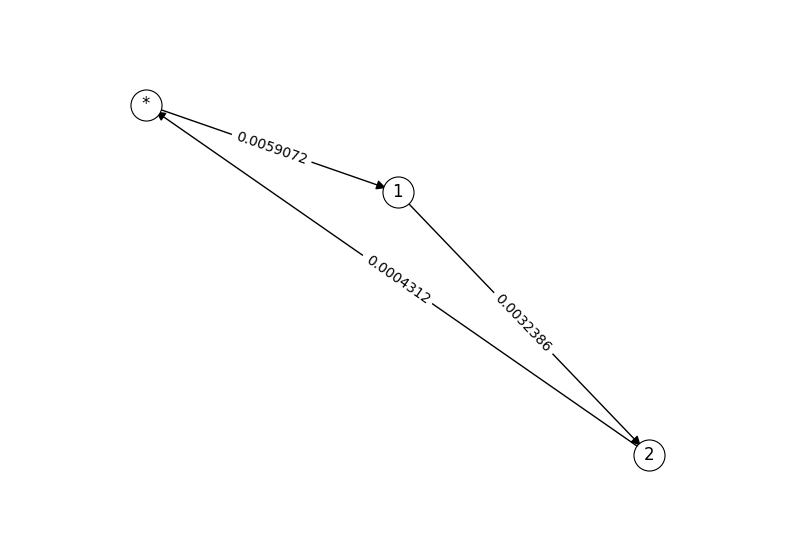

In [ ]:
sfp6_result = sfp6.run(100)

In [ ]:
sfp7_result = sfp7.run(100)

In [ ]:
sfp8_result = sfp8.run(100)

In [ ]:
edge = ('*', '1')
sp.compare_edges(sfp6_result, edge, sfp7_result, edge)

In [ ]:
sfp6_result.inspect_edge(('*', '1'))

In [ ]:
sfp7_result.inspect_edge(('*', '1'))

# Yet another experiment

In [ ]:
def f1(args):
    x, y = args
    print(x * y)

def f2(l, args):
    x, y = args
    l.acquire()
    try:
        print(x * y)
    finally:
        l.release()

In [ ]:
dataset = [(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

def ff1():
    for i in range(5):
        f1(dataset[i])

def ff2():
    lock = mp.Lock()

    for i in range(5):
        p = mp.Process(target=f2, args=(lock, dataset[i]))
        p.start()
        p.join()

In [ ]:
sfp1 = sfp(ff1)
sfp2 = sfp(ff2)

In [ ]:
sfp1.run(100)